In [0]:
%load_ext autoreload
%autoreload 2

In [2]:
import os.path
if not os.path.exists('mlp_helper.py'):
    !wget https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py

--2019-10-15 17:59:40--  https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-ml-itba/MLP-2019/master/mlp_helper.py [following]
--2019-10-15 17:59:46--  https://raw.githubusercontent.com/lab-ml-itba/MLP-2019/master/mlp_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13701 (13K) [text/plain]
Saving to: ‘mlp_helper.py’

mlp_helper.py       100%[===================>]  13.38K  --.-KB/s    in 0.003s  

2019-10-15 17:59:46 (4.11 MB/s) - ‘mlp_helper.py’ saved [13701/13701]



In [0]:
from mlp_helper import plot_boundaries_keras, get_dataset, plot_boundaries, draw_neural_net, return_weights_notation, get_dataset_2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

# Pruebas a realizar:
- hidden_units en 2 y 3
- Cambiar funcion de activación de la capa oculta: Sigmoid, Relu, Linear

# Dataset

In [0]:
# Cantidad de capas ocultas
hidden_units = 5

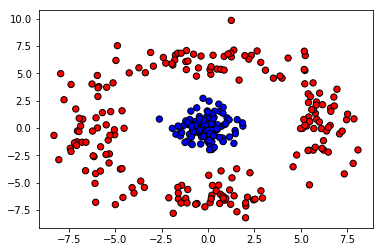

In [185]:
if hidden_units==2:
    X, y = get_dataset()
else:
    X, y = get_dataset_2()
plot_boundaries(X, y)

# Modelo: Red neuronal con 1 capa oculta

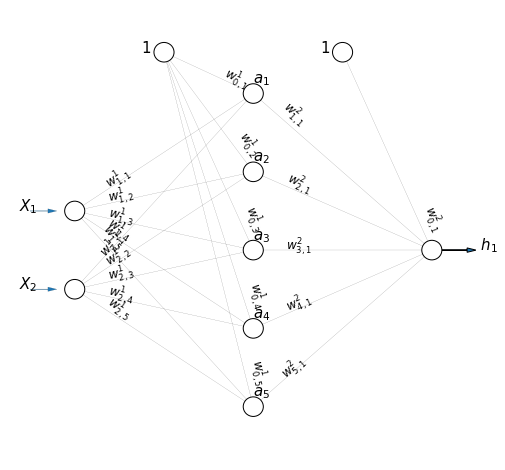

In [186]:
input_dim = 2

fig, ax = plt.subplots(1,1,figsize=(8, 8))
shape = [input_dim,hidden_units,1]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

### Selección de función de activación
https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [0]:
def plot_act(activ):
    t = np.linspace(-10, 10, 100)
    plt.plot(t, activ(t))
    plt.show()

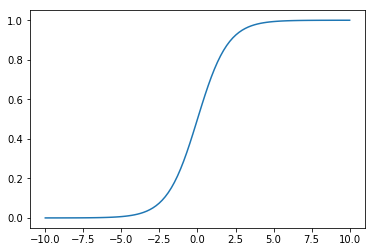

In [190]:
plot_act(sigmoid)

In [0]:
activation = 'sigmoid' # linear, tanh, relu, tanh, sigmoid (para la capa oculta, no tiene sentido ponerle lineal)

In [192]:
model = Sequential() #modelo por capas
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation)) #agregar capas al modelo
model.add(Dense(1, activation='sigmoid')) #en la salida siempre va una sigmoidea
model.summary()
#2 entradas, 2 capas ocultas, 1 salida

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import Adam, SGD
model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy']) #compila el modelo seleccionando optimizador, funcion de costo y metrica

In [194]:
model.evaluate(X, y) #es el score

300/300 [==============================] - 1s 2ms/step


[0.7426229638854662, 0.6666666666666666]

In [195]:
weights = model.get_weights() #devuelve una lista con los pesos de cada capa
print(weights)

[array([[-0.39386153,  0.88206935,  0.19379163, -0.30413765,  0.05883497],
       [-0.20692456,  0.19002903,  0.228701  , -0.47441596, -0.80400103]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[-0.8048723 ],
       [-0.80941296],
       [-0.6773796 ],
       [-0.9862492 ],
       [-0.1809957 ]], dtype=float32), array([0.], dtype=float32)]


In [196]:
weights[0].shape, X[0:1].shape #cuantas entradas (2) y cuantas salidas (1)

((2, 5), (1, 2))

In [197]:
i = 1
sigmoid(np.dot(sigmoid(np.dot(X[i:i+1], weights[0]) + weights[1]), weights[2]) + weights[3]) #redict a mano

array([[0.16791188]])

In [198]:
model.predict(X[i:i+1]) #predict espera una lista de observaciones

array([[0.16791187]], dtype=float32)

## Para recordar:

- Una red neuronal es la concatenación de capas
- Cada capa hace el producto entre el vector fila de entrada con la matriz de pesos, le suma el bias y luego aplica función de activación

# Entrenamiento

In [199]:
model.fit(X, y, epochs=10, verbose=1, batch_size=32)

Epoch 1/10
300/300 [==============================] - 1s 2ms/step - loss: 0.6750 - acc: 0.6667
Epoch 2/10
300/300 [==============================] - 0s 61us/step - loss: 0.5580 - acc: 0.6667
Epoch 3/10
300/300 [==============================] - 0s 76us/step - loss: 0.4539 - acc: 0.7233
Epoch 4/10
300/300 [==============================] - 0s 58us/step - loss: 0.3263 - acc: 0.9633
Epoch 5/10
300/300 [==============================] - 0s 65us/step - loss: 0.2205 - acc: 0.9867
Epoch 6/10
300/300 [==============================] - 0s 59us/step - loss: 0.1605 - acc: 0.9833
Epoch 7/10
300/300 [==============================] - 0s 58us/step - loss: 0.1238 - acc: 0.9867
Epoch 8/10
300/300 [==============================] - 0s 56us/step - loss: 0.0857 - acc: 1.0000
Epoch 9/10
300/300 [==============================] - 0s 58us/step - loss: 0.0655 - acc: 1.0000
Epoch 10/10
300/300 [==============================] - 0s 53us/step - loss: 0.0509 - acc: 1.0000


300/300 [==============================] - 0s 40us/step


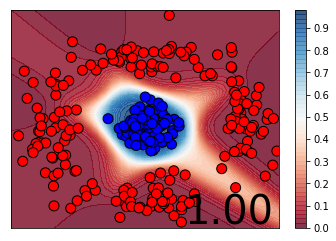

In [200]:
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba, h=0.5)

## Obtenemos pesos de primera capa
### Pesos aprendidos

In [201]:
model.get_weights()

[array([[-1.7393744 ,  1.5883154 ,  1.5130967 , -1.1701596 ,  0.33472976],
        [-0.00695598, -1.2551137 ,  1.369899  , -1.51847   , -1.7326232 ]],
       dtype=float32),
 array([-4.402839 , -4.428607 , -4.366569 , -4.3247514,  5.3096557],
       dtype=float32),
 array([[-3.5006416],
        [-3.9662232],
        [-3.8576252],
        [-3.7999785],
        [ 3.153625 ]], dtype=float32),
 array([0.43925208], dtype=float32)]

In [202]:
# Nos quedamos con los pesos de la primer capa
layer_1_w = model.get_weights()[0]
layer_1_b = model.get_weights()[1]
print(layer_1_w)
print(layer_1_b)

[[-1.7393744   1.5883154   1.5130967  -1.1701596   0.33472976]
 [-0.00695598 -1.2551137   1.369899   -1.51847    -1.7326232 ]]
[-4.402839  -4.428607  -4.366569  -4.3247514  5.3096557]


In [203]:
# Preparo los pesos a asignar a un "submodelo" de "regresión logistica"
model_1_weights = [np.array([layer_1_w[:,0]]).T, np.array([layer_1_b[0]])]
print(model_1_weights)

[array([[-1.7393744 ],
       [-0.00695598]], dtype=float32), array([-4.402839], dtype=float32)]


In [204]:
# Construimos el submodelo
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(2,), activation=activation))
model_1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Le asginamos los pesos al submodelo
model_1.set_weights(model_1_weights)
model_1.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])

300/300 [==============================] - 1s 2ms/step


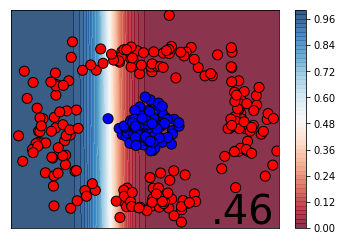

In [206]:
plot_boundaries_keras(X, y, model_1.evaluate(X,y)[1], probability_func=model_1.predict_proba, h=0.5)

### Generalizo función para armar submodelo
Y grafico los dos submodelos

In [0]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return sub_model

### Graficamos las rectas aprendidas por los submodelos

300/300 [==============================] - 1s 2ms/step


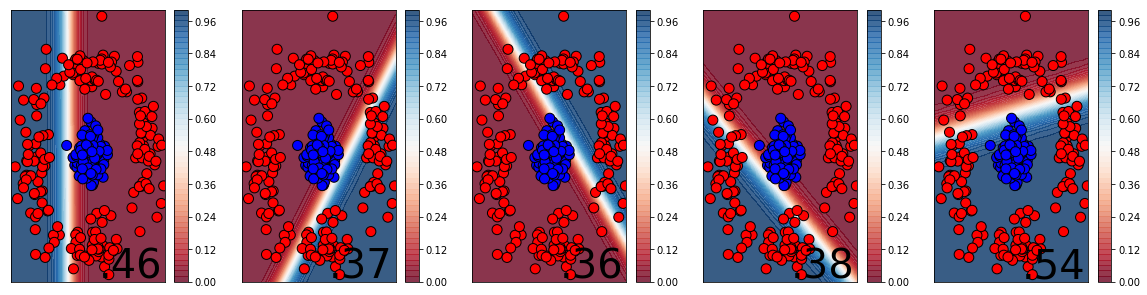

In [208]:
f, ax = plt.subplots(1, hidden_units, figsize=(20,5))
sub_models = []
for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation)
    sub_models.append(sub_model)
    plot_boundaries_keras(X, y, sub_model.evaluate(X,y)[1], probability_func=sub_model.predict_proba, ax=ax[i], h=0.5)

In [209]:
# Notar que en los gráficos se ve que parece estar al reves.
model.get_weights()[2]

array([[-3.5006416],
       [-3.9662232],
       [-3.8576252],
       [-3.7999785],
       [ 3.153625 ]], dtype=float32)

In [0]:
# Por eso los pesos del siguiente submodelo (el que combina los dos) son negativos

# Espacio linealmente separable

# Para graficos 3d
conda install -c conda-forge ipympl
# If using JupyterLab
conda install nodejs
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install jupyter-matplotlib

In [0]:
X_sub_preds = []
for i in range(hidden_units):
    X_sub_preds.append(sub_models[i].predict(X))

In [0]:
# Calculamos la ubicación de las observaciones en el nuevo espacio
new_space = np.hstack(X_sub_preds)

In [213]:
new_space.shape

(300, 5)

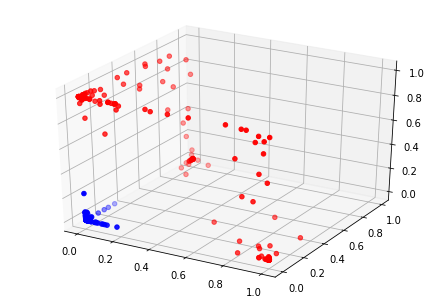

In [179]:
# Graficamos los puntos en el nuevo espacio
if hidden_units == 2:
    plt.scatter(new_space[y==1,0], new_space[y==1,1])
    plt.scatter(new_space[y==0,0], new_space[y==0,1])
    plt.show()
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')

In [0]:
# Creo el submodelo de la salida. Lleva sigmoidea por que es ya la predicción
sub_model_3 = get_sub_model(model, 0, 2, 3, activation='sigmoid', input_dim=hidden_units)

In [181]:
sub_model_3.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [182]:
weights_3 = sub_model_3.get_weights()
weights_3

[array([[-7.2325907],
        [-7.0509343],
        [-6.8563094]], dtype=float32), array([3.3091474], dtype=float32)]

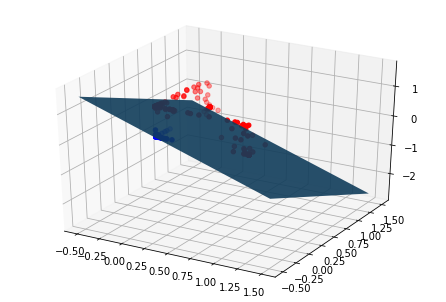

In [183]:
if hidden_units == 2:
    plot_boundaries_keras(new_space, y, sub_model_3.evaluate(new_space,y)[1], probability_func=sub_model_3.predict_proba, h=0.2)
else:
    # %matplotlib widget
    N=2
    xi, yi = np.meshgrid(np.linspace(-0.5, 1.5, N), np.linspace(-0.5, 1.5, N))
    z = (- xi*weights_3[0][0, 0 ] - yi*weights_3[0][1, 0] - weights_3[1][0])/weights_3[0][2,0]
    z = z 
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(xi, yi, z, alpha= 0.9)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    # ax.view_init(elev=20., azim=60)

    plt.show()